<a href="https://colab.research.google.com/github/lorenzo1285/Analisis_Financiero/blob/main/Portafolio_Inversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada.

Actividad 7. Proyecto Integrador, Etapa 2 

Lorenzo Cárdenas Cárdenas 

Universidad del Valle de México 

Administración de Portafolios de Inversión 

Docente: Mtra Clara Arechiga Alvarado 

Matricula: 860131208

La correspondiente investigación está dirigida a nombre de Lorenzo Cárdenas  Cárdenas 
La correspondencia relacionada con esta investigación debe ser dirigida a nombre de Lorenzo Cárdenas Cárdenas,  Universidad del Valle de México, Calle Tezcatlipoca 2301, Los Rodríguez, 25204 Saltillo, Coah.  Correo: a860131208@my.uvm.edu.mx

Importación de Paqueterias 

In [ ]:
from finquant.portfolio import build_portfolio
from datetime import *
import yahoo_fin.stock_info as yf
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pylab as plt
import seaborn as sns
import investpy as ip
sns.set_style("whitegrid")
%matplotlib inline

# Análisis comparativo financiero y graficas de comportamiento

Creación de Portafolio

In [ ]:
d_1 =  {'Name':['ALFAA.MX', 'HERDEZ.MX', 'WALMEX.MX'],
      
      'Allocation':[.33, .33, .33]
        }
df = pd.DataFrame(data=d_1)
df.head()

,Name,Allocation
0,ALFAA.MX,0.33
1,HERDEZ.MX,0.33
2,WALMEX.MX,0.33


IPC portafolio

In [ ]:
d_2 =  {'Name':['^MXX'],
      
      'Allocation':[.99]
        }
df_1 = pd.DataFrame(data=d_2)
df_1.head()

,Name,Allocation
0,^MXX,0.99


Establecer el periodo de tiempo

In [ ]:
tday = date.today().strftime("%Y-%m-%d")
tdelta = timedelta(days=252*2) # 2 años de datos
ytday_2 = (date.today() - tdelta).strftime("%Y-%m-%d")

Parametros del portafolio

In [ ]:
names = df['Name'].to_list()
pf = build_portfolio(names= names,
                     pf_allocation=df,
                     start_date= '2020-10-05',
                     end_date=tday,
                     data_api="yfinance")

[*********************100%***********************]  3 of 3 completed


c:\Users\LorenzoCardenas\anaconda3\envs\finance_101\lib\site-packages\finquant\portfolio.py:260: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.portfolio = self.portfolio.append(stock.investmentinfo, ignore_index=True)
c:\Users\LorenzoCardenas\anaconda3\envs\finance_101\lib\site-packages\finquant\portfolio.py:260: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.portfolio = self.portfolio.append(stock.investmentinfo, ignore_index=True)
c:\Users\LorenzoCardenas\anaconda3\envs\finance_101\lib\site-packages\finquant\portfolio.py:260: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.portfolio = self.portfolio.append(stock.investmentinfo, ignore_index=True)


In [ ]:
names = df_1['Name'].to_list()
start_date = ytday_2
end_date = tday
pf_1 = build_portfolio(names= names,
                     pf_allocation=df_1,
                     start_date= '2020-10-05',
                     end_date=tday,
                     data_api="yfinance")

[*********************100%***********************]  1 of 1 completed


c:\Users\LorenzoCardenas\anaconda3\envs\finance_101\lib\site-packages\finquant\portfolio.py:260: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.portfolio = self.portfolio.append(stock.investmentinfo, ignore_index=True)


In [ ]:
pf.data.head()

,ALFAA.MX,HERDEZ.MX,WALMEX.MX
Date,,,
2020-10-05,13.409082,38.067444,50.620663
2020-10-06,13.339399,37.714882,50.971447
2020-10-07,13.448902,38.219906,51.020168
2020-10-08,14.056144,38.353306,51.828930
2020-10-09,14.056144,38.353306,51.828930


In [ ]:
pf_1.data.head()

,^MXX
Date,
2020-10-05,36740.328125
2020-10-06,36947.871094
2020-10-07,37418.789062
2020-10-08,38404.050781
2020-10-09,38478.578125


In [ ]:
df_worksheet = pf.data.copy()
df_worksheet['MXX'] = pf_1.data['^MXX']
df_worksheet.head()

,ALFAA.MX,HERDEZ.MX,WALMEX.MX,MXX
Date,,,,
2020-10-05,13.409082,38.067444,50.620663,36740.328125
2020-10-06,13.339399,37.714882,50.971447,36947.871094
2020-10-07,13.448902,38.219906,51.020168,37418.789062
2020-10-08,14.056144,38.353306,51.828930,38404.050781
2020-10-09,14.056144,38.353306,51.828930,38478.578125


#  Variación porcentual en el precio

In [ ]:
for name in df_worksheet.columns:
    df_worksheet[f'{name}_rend'] = df_worksheet[name].pct_change()

df_worksheet.head()

,ALFAA.MX,HERDEZ.MX,WALMEX.MX,MXX,ALFAA.MX_rend,HERDEZ.MX_rend,WALMEX.MX_rend,MXX_rend
Date,,,,,,,,
2020-10-05,13.409082,38.067444,50.620663,36740.328125,NaN,NaN,NaN,NaN
2020-10-06,13.339399,37.714882,50.971447,36947.871094,-0.005197,-0.009262,0.006930,0.005649
2020-10-07,13.448902,38.219906,51.020168,37418.789062,0.008209,0.013391,0.000956,0.012745
2020-10-08,14.056144,38.353306,51.828930,38404.050781,0.045152,0.003490,0.015852,0.026331
2020-10-09,14.056144,38.353306,51.828930,38478.578125,0.000000,0.000000,0.000000,0.001941


In [ ]:
df_worksheet.tail()

,ALFAA.MX,HERDEZ.MX,WALMEX.MX,MXX,ALFAA.MX_rend,HERDEZ.MX_rend,WALMEX.MX_rend,MXX_rend
Date,,,,,,,,
2022-09-28,12.63,35.500000,72.400002,45442.210938,-0.007075,0.025715,-0.003441,0.009690
2022-09-29,12.64,35.790001,72.980003,45102.550781,0.000792,0.008169,0.008011,-0.007475
2022-09-30,12.80,37.500000,70.730003,44626.800781,0.012658,0.047779,-0.030830,-0.010548
2022-10-03,12.95,35.730000,71.449997,45429.750000,0.011719,-0.047200,0.010179,0.017993
2022-10-04,12.72,36.500000,71.800003,46046.578125,-0.017761,0.021551,0.004899,0.013578


#  Variación sobre el índice de cada acción

In [ ]:
ipc_var = df_worksheet['MXX_rend']
ipc_var.head()

Date
2020-10-05         NaN
2020-10-06    0.005649
2020-10-07    0.012745
2020-10-08    0.026331
2020-10-09    0.001941
Name: MXX_rend, dtype: float64

In [ ]:
ipc_var.tail()

Date
2022-09-28    0.009690
2022-09-29   -0.007475
2022-09-30   -0.010548
2022-10-03    0.017993
2022-10-04    0.013578
Name: MXX_rend, dtype: float64

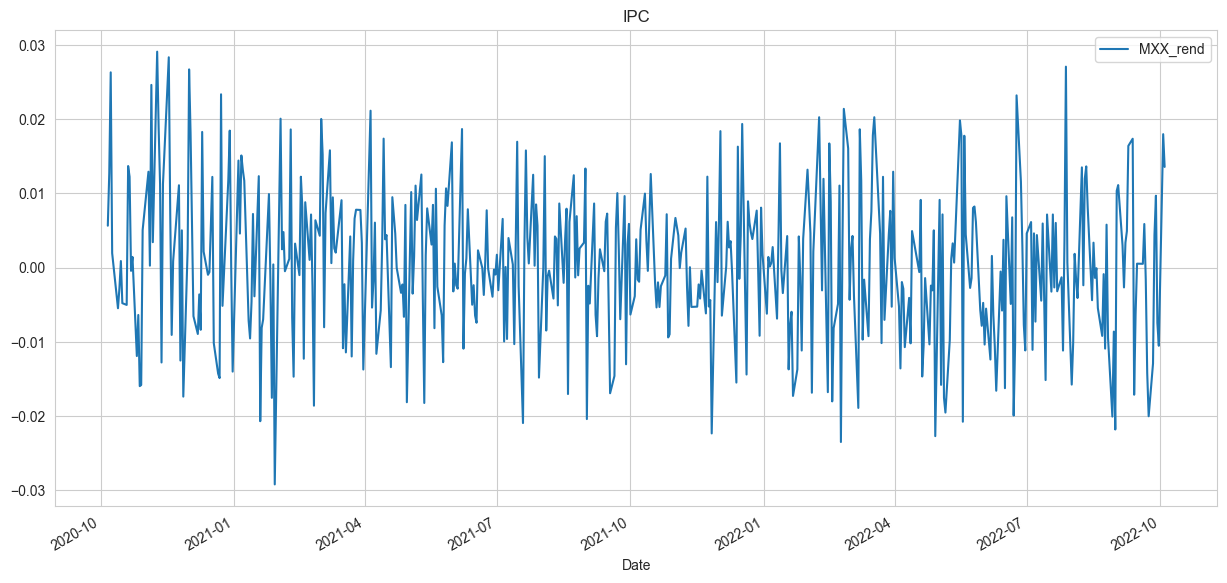

In [ ]:
ipc_var.plot(figsize=(15, 7), title='IPC', legend=True);

#  Porcentaje de beneficio acumulado

In [ ]:
retornos = pf.comp_mean_returns(freq=252*2)
retornos = retornos.to_frame()
retornos.rename(columns={0:'Retornos_24M'}, inplace=True)
retornos

,Retornos_24M
ALFAA.MX,0.061025
HERDEZ.MX,0.093646
WALMEX.MX,0.423234


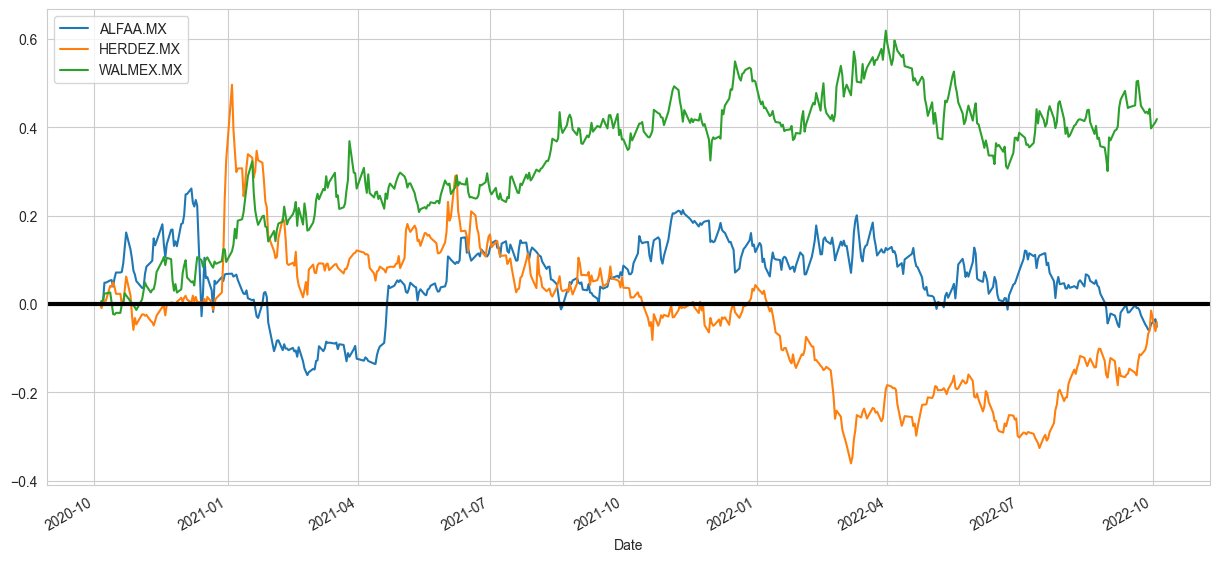

In [ ]:
pf.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)
plt.rcParams["figure.figsize"] = (15,7)
plt.show()

Retorno de IPC

In [ ]:
retornos = pf_1.comp_mean_returns(freq=252*2)
retornos = retornos.to_frame()
retornos.rename(columns={0:'Retornos'}, inplace=True)
retornos

,Retornos
^MXX,0.250713


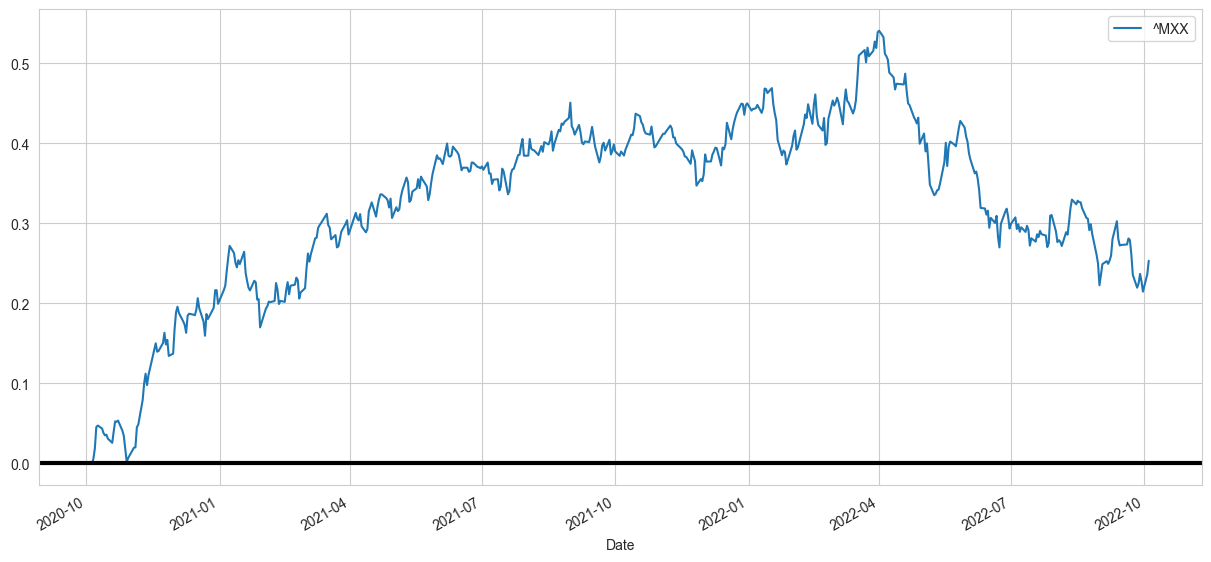

In [ ]:
pf_1.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)
plt.rcParams["figure.figsize"] = (15,7)
plt.show()

Rendimiento de la cartera

In [ ]:
pf.properties()

----------------------------------------------------------------------
Stocks: ALFAA.MX, HERDEZ.MX, WALMEX.MX
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.096
Portfolio Volatility: 0.215
Portfolio Sharpe Ratio: 0.425

Skewness:
   ALFAA.MX  HERDEZ.MX  WALMEX.MX
0  -0.58972   0.019811  -0.605564

Kurtosis:
   ALFAA.MX  HERDEZ.MX  WALMEX.MX
0  0.158029  -0.363502  -0.291511

Information:
        Name  Allocation   weights
0   ALFAA.MX        0.33  0.333333
1  HERDEZ.MX        0.33  0.333333
2  WALMEX.MX        0.33  0.333333
----------------------------------------------------------------------


# Ponderación de la cartera

In [ ]:
df

,Name,Allocation,weights
0,ALFAA.MX,0.33,0.333333
1,HERDEZ.MX,0.33,0.333333
2,WALMEX.MX,0.33,0.333333


In [ ]:
weights = pf.comp_weights()
df['weights'] = weights

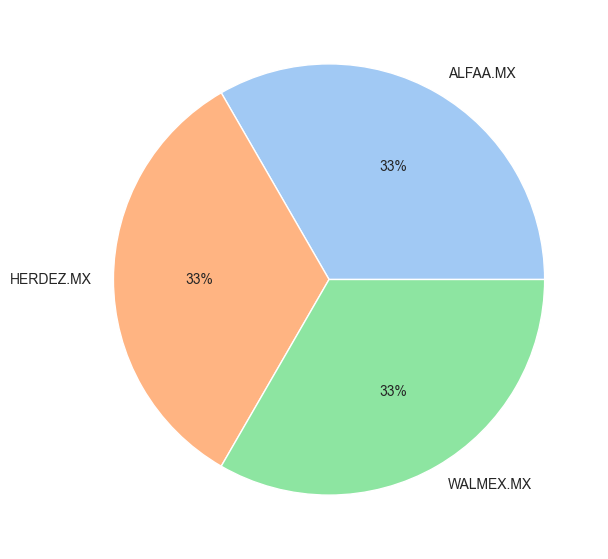

In [ ]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(weights,labels=df['Name'],colors=colors,autopct='%.0f%%')
plt.show()

In [ ]:
pf.ef_minimum_volatility(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.120
Annual Volatility: 0.209
Sharpe Ratio: 0.554

Optimal weights:
            ALFAA.MX  HERDEZ.MX  WALMEX.MX
Allocation  0.299782   0.223775   0.476443
----------------------------------------------------------------------


,Allocation
ALFAA.MX,0.299782
HERDEZ.MX,0.223775
WALMEX.MX,0.476443


In [ ]:
allocation = pf.ef_minimum_volatility(verbose=False)
allocation 

,Allocation
ALFAA.MX,0.299782
HERDEZ.MX,0.223775
WALMEX.MX,0.476443


Revalanciamiento de la cartera optimizada

metodo de minima varianza

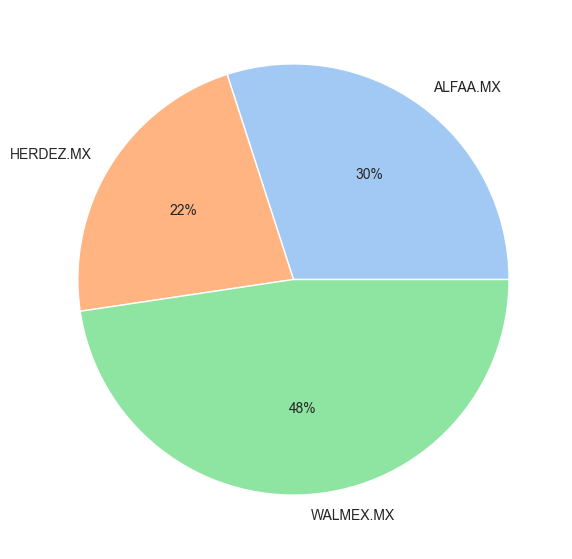

In [ ]:
plt.pie(allocation['Allocation'],labels=allocation.index,colors=colors,autopct='%.0f%%')
plt.show()

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 252 days
Expected return: 0.120
Volatility: 0.209
Sharpe Ratio: 0.552

Optimal weights:
            ALFAA.MX  HERDEZ.MX  WALMEX.MX
Allocation  0.299824   0.225879   0.474297
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 252 days
Expected return: 0.201
Volatility: 0.260
Sharpe Ratio: 0.753

Optimal weights:
            ALFAA.MX  HERDEZ.MX  WALMEX.MX
Allocation  0.042069   0.020788   0.937144
----------------------------------------------------------------------


c:\Users\LorenzoCardenas\anaconda3\envs\finance_101\lib\site-packages\finquant\portfolio.py:684: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


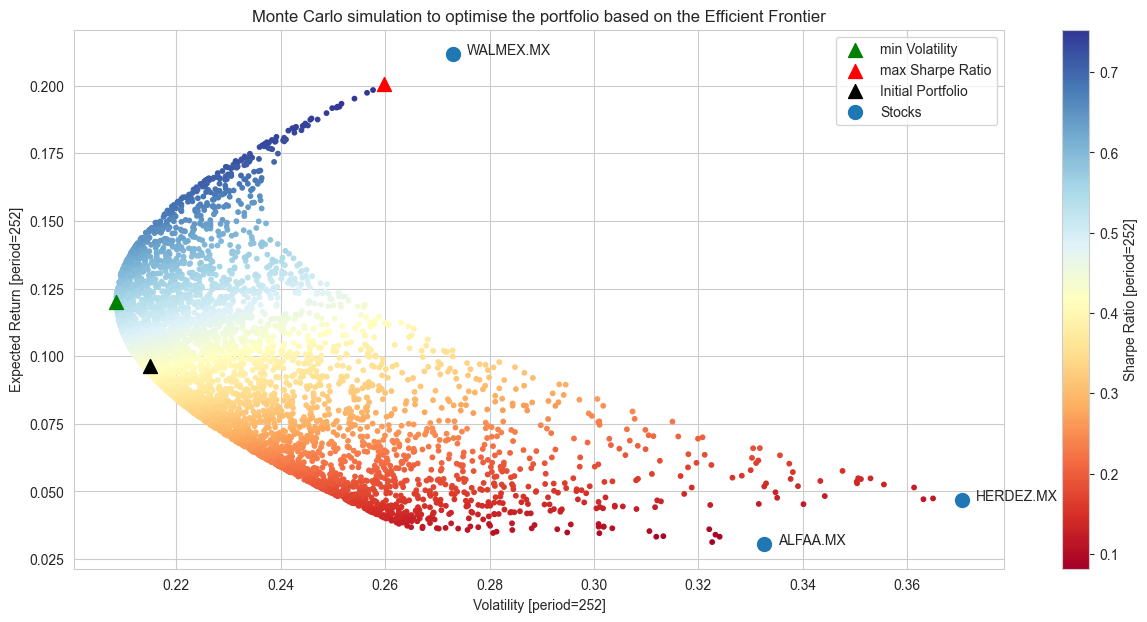

In [ ]:
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_properties()
pf.mc_plot_results()
pf.plot_stocks()
plt.show()

# Bibliografía

Referencias:

Alfa, S. A. B. de C. V. (ALFAA.MX) Stock Price, News, Quote & History. (n.d.). Yahoo Finance. Retrieved September 22, 2022, from https://finance.yahoo.com/quote/ALFAA.MX?p=ALFAA.MX&.tsrc=fin-srch

Grupo Herdez, S.A.B. de C.V. (HERDEZ.MX) Stock Price, News, Quote & History. (n.d.). Yahoo Finance. Retrieved September 22, 2022, from https://finance.yahoo.com/quote/HERDEZ.MX?p=HERDEZ.MX&.tsrc=fin-srch

Wal-Mart de México, S.A.B. de C.V. (WALMEX.MX) Stock Price, News, Quote & History. (n.d.). Yahoo Finance. Retrieved September 22, 2022, from https://finance.yahoo.com/quote/WALMEX.MX?p=WALMEX.MX

IPC MEXICO (^MXX) Charts, Data & News. (n.d.). Yahoo Finance. Retrieved October 5, 2022, from https://finance.yahoo.com/quote/%5EMXX?p=%5EMXX&.tsrc=fin-srch



